In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib as mpl
import sklearn.preprocessing as pre
import matplotlib.pyplot as plt
from matplotlib import axes
import pickle
import scipy
from datetime import datetime
from scipy import log,exp,sqrt,stats
print('Packages')

Packages


In [2]:
# Importing pickle file
data1 = np.load('/Users/louisribieras/Desktop/Invictus/Data/latest_coin_data.pkl')
data2 = np.load('/Users/louisribieras/Desktop/Invictus/Data/additional_data.pkl')

# Removing July dates from data1
data1 = data1.drop(data1.columns[0:4], axis = 1)

# Combining the two dataframes
data = pd.concat([data2, data1], axis = 1, join = 'outer', sort = True)
data = data.dropna()
print('Loading of Data')
print('shape of data: ', data.shape)

Loading of Data
shape of data:  (127, 947)


In [3]:
print('tether data')
data.loc['tether'].head(3)

tether data


Aug 04, 2018    {'open_price': 1.0, 'high_price': 1.0, 'low_pr...
Aug 03, 2018    {'open_price': 1.0, 'high_price': 1.0, 'low_pr...
Aug 02, 2018    {'open_price': 0.998746, 'high_price': 1.0, 'l...
Name: tether, dtype: object

In [4]:
mc_list = list()

for date in data.index:
    for column in data.columns:
        mc_list.append(data[column][date]['market_cap'])
        
# Splitting list into 133 lists (one per coin)
mc_list = [mc_list[i:i+947] for i  in range(0, len(mc_list), 947)]

mc_df = pd.DataFrame(data = mc_list, index = data.index, columns = data.columns)

In [5]:
mc_df.head(5)

,"Aug 04, 2018","Aug 03, 2018","Aug 02, 2018","Aug 01, 2018","Jul 31, 2018","Jul 30, 2018","Jul 29, 2018","Jul 28, 2018","Jul 27, 2018","Jul 26, 2018",...,"Jan 10, 2016","Jan 09, 2016","Jan 08, 2016","Jan 07, 2016","Jan 06, 2016","Jan 05, 2016","Jan 04, 2016","Jan 03, 2016","Jan 02, 2016","Jan 01, 2016"
1337coin,2726061.0,3068229.0,3238470.0,3475947.0,3682281.0,3737295.0,4182793.0,4084110.0,3855405.0,4237005.0,...,418.0,359.0,223.0,183.0,242.0,164.0,241.0,243.0,243.0,162.0
adzcoin,482515.0,501510.0,517771.0,541450.0,571739.0,612960.0,611210.0,695124.0,621686.0,657441.0,...,17456.0,16553.0,16866.0,26063.0,29340.0,21986.0,26662.0,28755.0,29917.0,25523.0
aeon,20567903.0,21383607.0,22725315.0,22957751.0,25737805.0,26672843.0,26386610.0,25677360.0,24770694.0,25962802.0,...,112095.0,122310.0,132819.0,128547.0,133294.0,124865.0,137105.0,137682.0,148680.0,142833.0
anarchistsprime,6524.0,7292.0,8364.0,8852.0,10062.0,10114.0,10836.0,11133.0,11529.0,12210.0,...,829.0,870.0,851.0,805.0,847.0,897.0,905.0,933.0,900.0,1756.0
artbyte,2835154.0,2699461.0,3142321.0,3370963.0,3573040.0,3648921.0,3839169.0,3870538.0,3775339.0,3894053.0,...,48749.0,54312.0,49798.0,48249.0,47622.0,52167.0,46571.0,46898.0,46950.0,48925.0


In [6]:
mc_dft = mc_df.T

mc_dft['Total'] = mc_df.sum(axis=0)

In [7]:
print('Creating Volume and Market Cap df for Tether')

usdt = pd.DataFrame(data = data.loc['tether'])

usdt_vol_list = list()

# Getting Volume and Market Cap
for day in usdt.index:
    usdt_vol_list.append(usdt['tether'][day]['volume'])

usdt_data = pd.DataFrame(data = usdt_vol_list, index = usdt.index, columns = ['volume'])
usdt_data['total_mc'] = mc_dft['Total']

Creating Volume and Market Cap df for Tether


In [8]:
print('usdt_data')
usdt_data.head(3)

usdt_data


,volume,total_mc
"Aug 04, 2018",2.526060e+09,2.073007e+11
"Aug 03, 2018",2.843800e+09,2.085604e+11
"Aug 02, 2018",2.539460e+09,2.119791e+11


In [9]:
r = scipy.stats.pearsonr(usdt_data['volume'],usdt_data['total_mc'])
print('Pearson r,p: ', r)

Pearson r,p:  (0.8449828172398134, 4.196876350351887e-259)


In [10]:
scaler = pre.MinMaxScaler(feature_range=(0,1))
usdt_vol = scaler.fit_transform(usdt_data)

In [11]:
usdt_data2 = pd.DataFrame(data = usdt_vol, index = usdt.index, columns = ['volume','total_mc'])

In [12]:
usdt_data2t = usdt_data2.T

usdt_data2t = usdt_data2t[usdt_data2t.columns[::-1]]

In [13]:
usdt_data_final = usdt_data2t.T

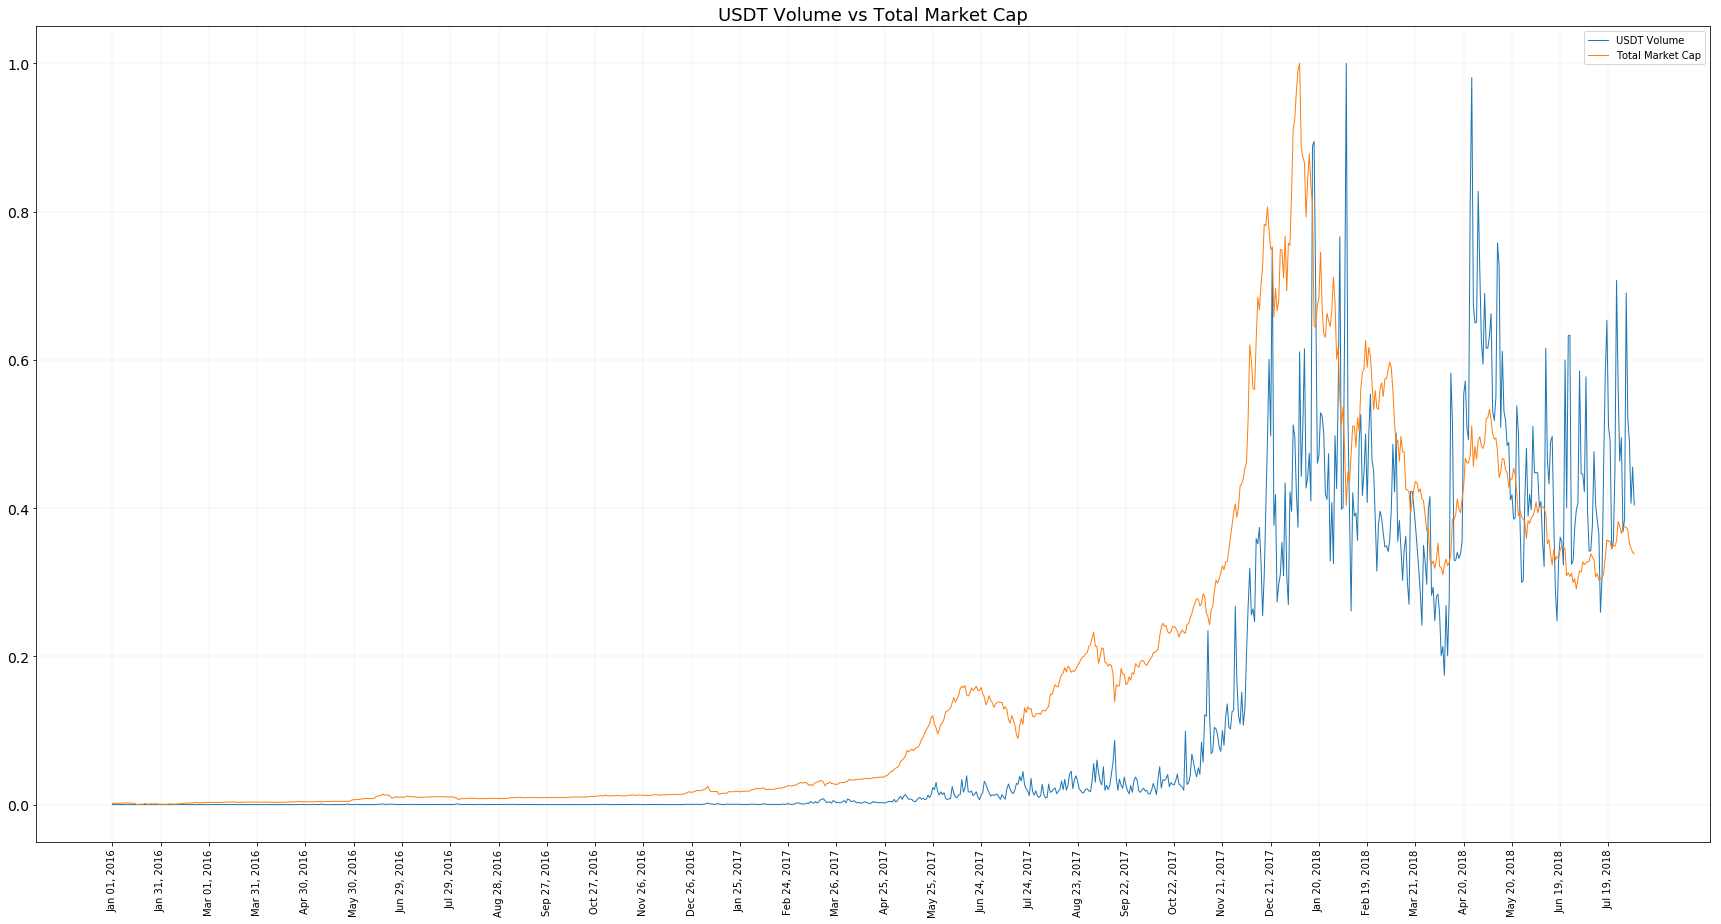

''

In [17]:
plt.plot(usdt_data_final['volume'], linewidth = 1)
plt.plot(usdt_data_final['total_mc'], linewidth = 1)
plt.gca().legend(['USDT Volume','Total Market Cap'])
plt.title('USDT Volume vs Total Market Cap', fontsize = 18)
plt.rcParams['figure.figsize'] = (30,15)
plt.grid(color='black', linestyle='-', linewidth=0.05)
plt.xticks(np.arange(0,947,step=30), rotation=90, fontsize = 10)
plt.yticks(fontsize = 14)
plt.show()
;

In [15]:
usdt_end = usdt_data_final.drop(usdt_data_final.index[0:570])
usdt_end.shape

(377, 2)

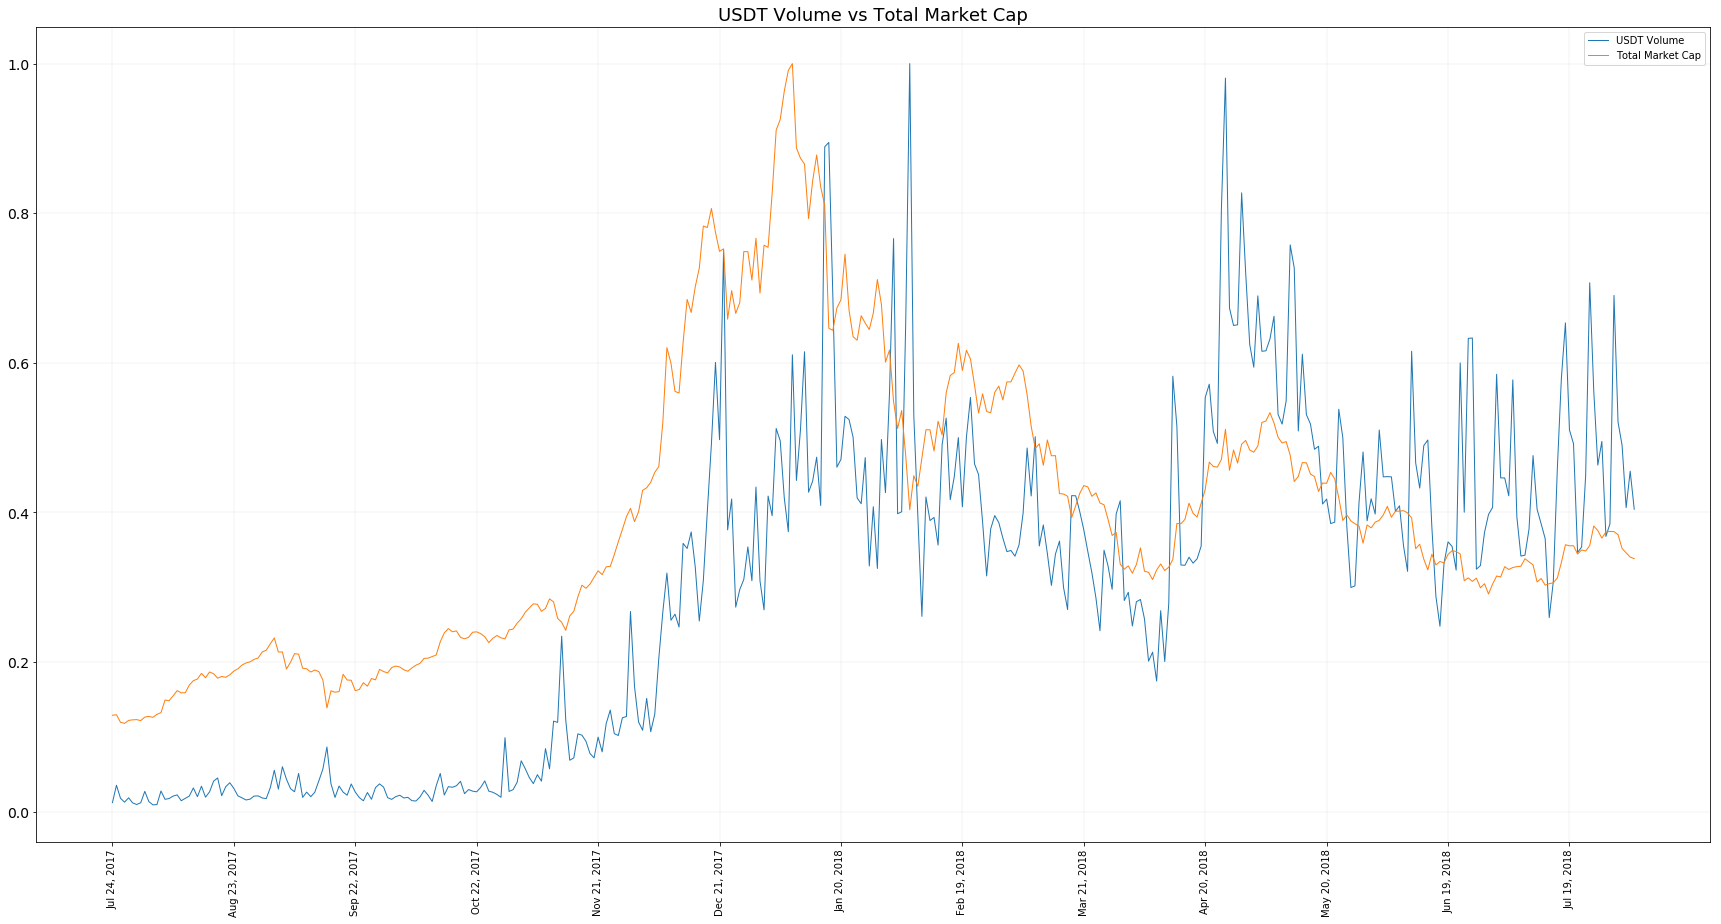

''

In [16]:
plt.plot(usdt_end['volume'], linewidth = 1)
plt.plot(usdt_end['total_mc'], linewidth = 1)
plt.gca().legend(['USDT Volume','Total Market Cap'])
plt.title('USDT Volume vs Total Market Cap', fontsize = 18)
plt.rcParams['figure.figsize'] = (30,15)
plt.grid(color='black', linestyle='-', linewidth=0.05)
plt.xticks(np.arange(0,377,step=30), rotation=90, fontsize = 10)
plt.yticks(fontsize = 14)
plt.show()
;